<a href="https://colab.research.google.com/github/ahmadSoliman94/Machine-Learning/blob/main/ML/Projects/Electro-Pi-projects/Classification/Kopie_von_Classifiers_and_Model_Things.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Welcome to  your first Classification Tasks 
Get Ready to Dig in Classification World

# **Classifiers** 


In [ ]:
from google.colab import drive
drive.mount('/content/drive')
import os 
os.chdir('drive/My Drive/')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
!ls
os.chdir('Fusion/')

 Classroom	    Fusion	       'Medical deep learning'
'Colab Notebooks'   Hands-on-projects   projcet


In [ ]:
!ls

 50_Startups.csv	   diabetes_null.csv   slr02.xlsx
 boston.csv		   Insurance.xlsx      Social_Network_Ads.csv
'Concrete_Data (4).xlsx'   Salary_Data.csv     unprocessed_data.csv


In [ ]:
# imports
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score,recall_score
from sklearn import tree

In [ ]:
dataset = pd.read_csv('Social_Network_Ads.csv')
print(dataset)

      User ID  Gender  Age  EstimatedSalary  Purchased
0    15624510    Male   19            19000          0
1    15810944    Male   35            20000          0
2    15668575  Female   26            43000          0
3    15603246  Female   27            57000          0
4    15804002    Male   19            76000          0
..        ...     ...  ...              ...        ...
395  15691863  Female   46            41000          1
396  15706071    Male   51            23000          1
397  15654296  Female   50            20000          1
398  15755018    Male   36            33000          0
399  15594041  Female   49            36000          1

[400 rows x 5 columns]


Do you remember Label Encoding ? 
Look at this 

In [ ]:
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values
# splitting into test and train
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.20)
X_train

array([[15694879, 'Male', 37, 144000],
       [15631159, 'Male', 47, 20000],
       [15569641, 'Female', 58, 95000],
       ...,
       [15668575, 'Female', 26, 43000],
       [15736760, 'Female', 47, 49000],
       [15671249, 'Male', 46, 88000]], dtype=object)

In [ ]:
from sklearn.preprocessing import LabelEncoder
encoder=LabelEncoder()
X_train[:,1] = encoder.fit_transform(X_train[:,1])
X_test[:,1]=encoder.transform(X_test[:,1] )
X_train

array([[15694879, 1, 37, 144000],
       [15631159, 1, 47, 20000],
       [15569641, 0, 58, 95000],
       ...,
       [15668575, 0, 26, 43000],
       [15736760, 0, 47, 49000],
       [15671249, 1, 46, 88000]], dtype=object)

# **Decisison Tree**

In [ ]:
# function to perform training with entropy
clf = DecisionTreeClassifier()
clf.fit(X_train, y_train)

DecisionTreeClassifier()

In [ ]:
y_pred_en = clf.predict(X_test)
y_pred_train = clf.predict(X_train)
print('Accuracy score of Test: ', accuracy_score(y_test, y_pred_en)*100)
print('Accuracy score of Train: ', accuracy_score(y_train, y_pred_train)*100)


Accuracy score of Test:  81.25
Accuracy score of Train:  100.0


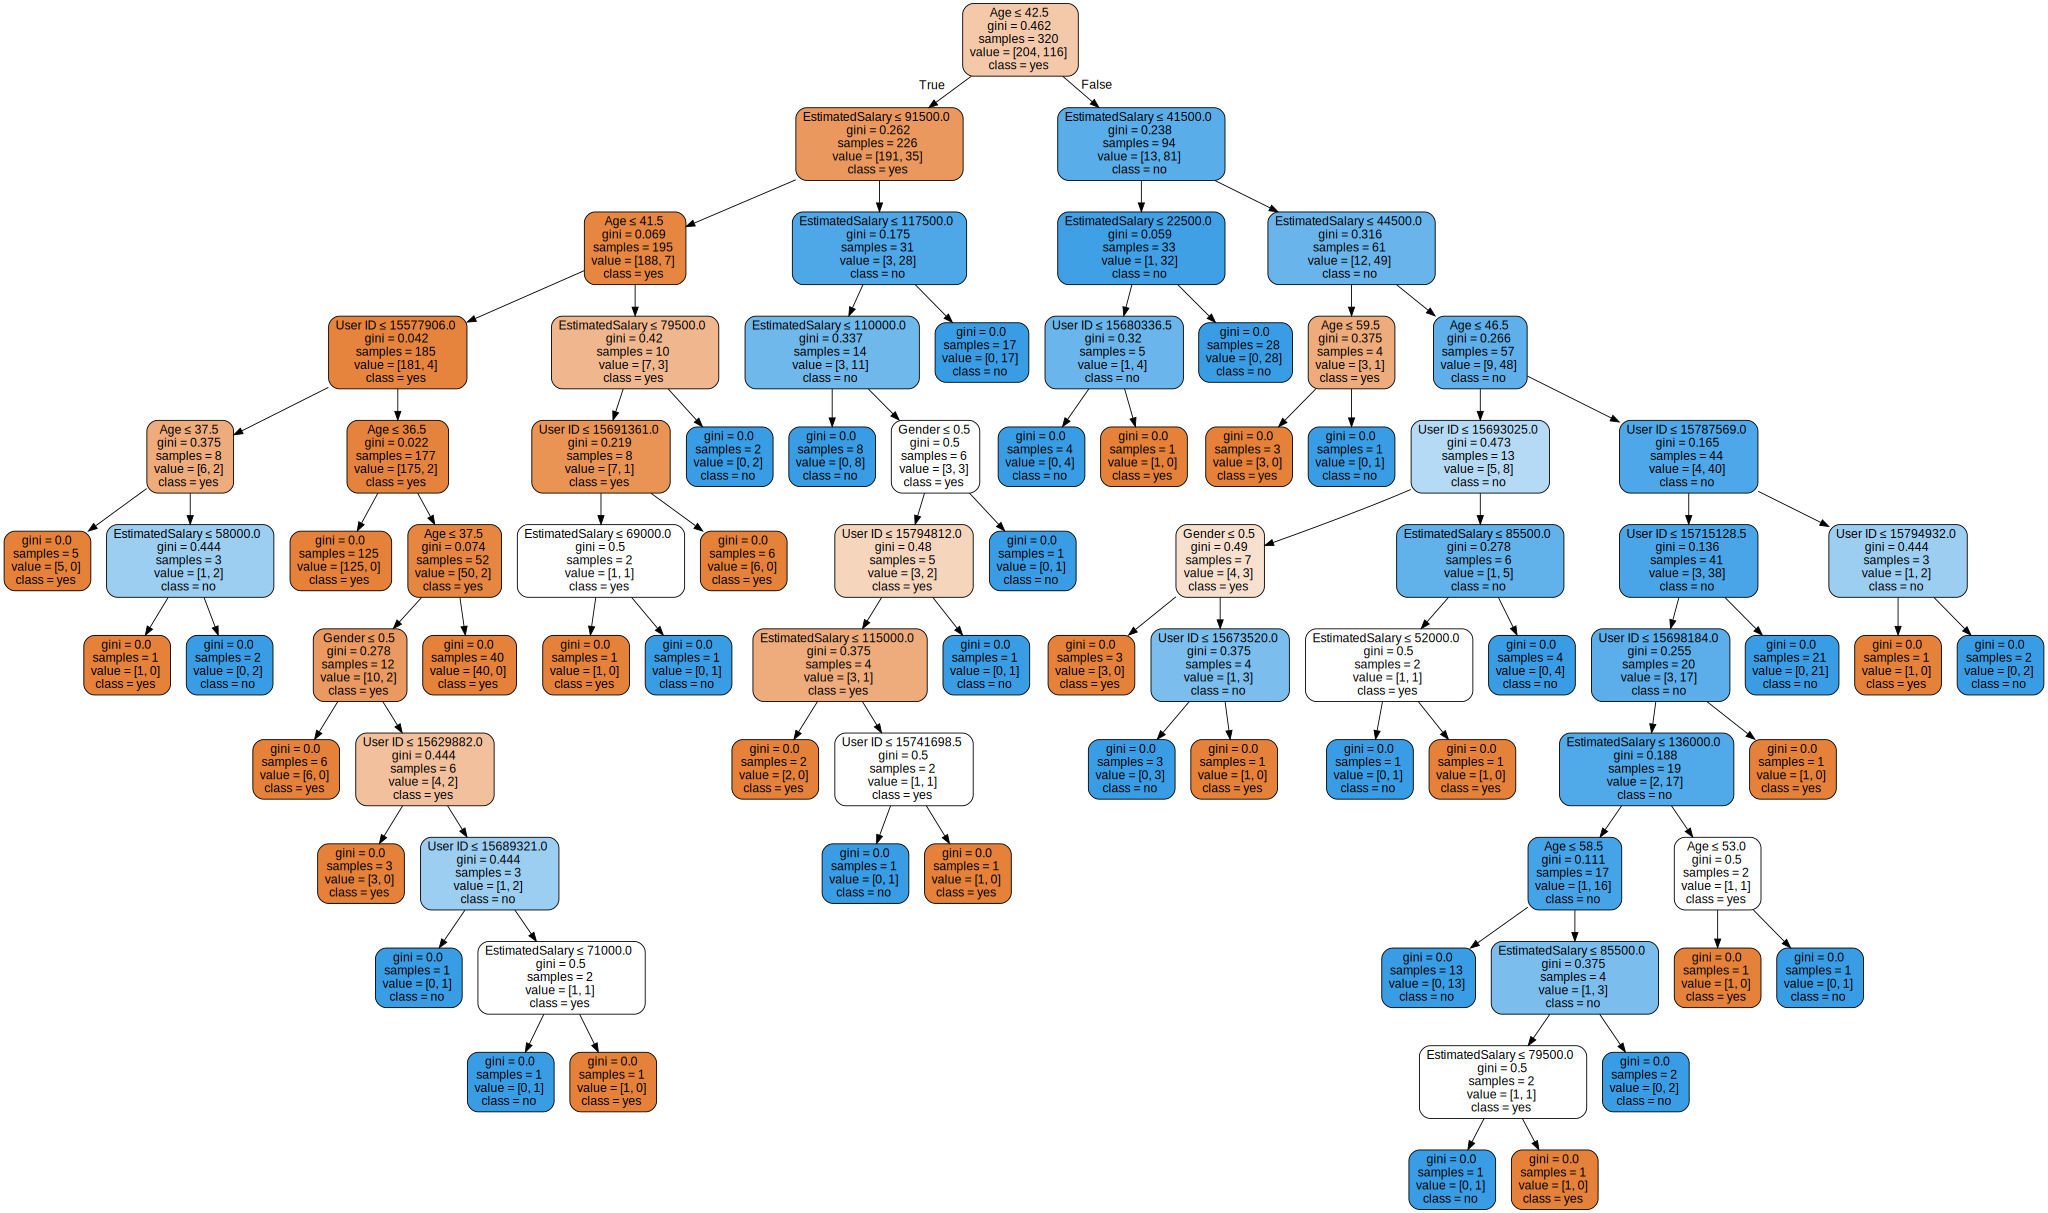

In [ ]:
# # For Visualization  of the Tree 
# import graphviz
# X = dataset.iloc[:, :-1]
# Y = dataset.iloc[:, -1]
# dot_data = tree.export_graphviz(clf, out_file=None, 
#                          feature_names = X.columns,  
#                          class_names = ["yes","no"],  
#                          filled=True, rounded=True,  
#                          special_characters=True)  
# graph = graphviz.Source(dot_data)  
# graph

# Try to increase the Accuracy of the Previous Decision Tree 

1. Play with Test Size. 
2. Try Scaling Techniques. 
3. Modify Tree Parameters.
4. Try To Understand Any Parameter You change.

### play with Test Size

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.25,shuffle=True,random_state=0)
print(f' X_train: {X_train.shape} & X_test: {X_test.shape}')
print(f' y_train: {y_train.shape} & y_test: {y_test.shape}')

 X_train: (300, 4) & X_test: (100, 4)
 y_train: (300,) & y_test: (100,)


In [ ]:
from sklearn.preprocessing import LabelEncoder
encoder=LabelEncoder()
X_train[:,1] = encoder.fit_transform(X_train[:,1])
X_test[:,1]=encoder.transform(X_test[:,1] )
X_train

array([[15810075, 0, 44, 39000],
       [15583681, 1, 32, 120000],
       [15733964, 0, 38, 50000],
       ...,
       [15591433, 1, 36, 52000],
       [15776348, 0, 27, 54000],
       [15794661, 0, 26, 118000]], dtype=object)

### Scaling Techniques

In [ ]:
# Normalization 
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print(np.min(X_train_scaled))
print(np.max(X_train_scaled))

0.0
1.0




### Training and Evaluating on the Training Set

In [ ]:
clf = DecisionTreeClassifier(criterion='entropy',splitter='best',max_depth=5,random_state=0)
clf.fit(X_train_scaled, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=5, random_state=0)

In [ ]:
y_pred_en = clf.predict(X_test_scaled)
y_pred_train = clf.predict(X_train_scaled)
print('Accuracy score of Test: ', accuracy_score(y_test, y_pred_en)*100)
print('Accuracy score of Train: ', accuracy_score(y_train, y_pred_train)*100)

Accuracy score of Test:  91.0
Accuracy score of Train:  93.33333333333333


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


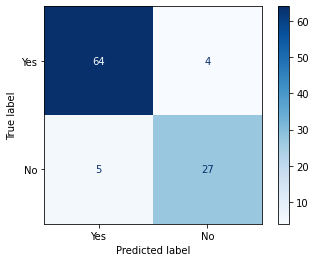

In [ ]:
from sklearn.metrics import plot_confusion_matrix
import matplotlib.pyplot as plt 

disp = plot_confusion_matrix(clf, X_test_scaled, y_test,
                              display_labels=['Yes','No'],
                              cmap=plt.cm.Blues)

# Build a Logistic Regression 

1. From Sk Learn Try to build a Logistic Regression
2. Check the Accuracy  of it and compare with DT 
3. What do you think Logistic Regression has limit with ? 

In [ ]:
# from sklearn.linear_model import LogisticRegression
# from sklearn.preprocessing import PolynomialFeatures
# from sklearn.preprocessing import MinMaxScaler

# poly_reg = PolynomialFeatures(degree = 3)
# X_train_poly_b = poly_reg.fit_transform(X_train)
# X_test_poly_b = poly_reg.transform(X_test)

# scaler = MinMaxScaler()
# X_train_scaled = scaler.fit_transform(X_train_poly_b)
# X_test_scaled = scaler.transform(X_test_poly_b)

# lg = LogisticRegression(penalty='l2',random_state=0)
# lg.fit(X_train_scaled, y_train)

In [ ]:
# y_pred_en = lg.predict(X_test_scaled)
# y_pred_train = lg.predict(X_train_scaled)
# print('Accuracy score of Test: ', accuracy_score(y_test, y_pred_en)*100)
# print('Accuracy score of Train: ', accuracy_score(y_train, y_pred_train)*100)

# **Confusion Matrix**  



In [ ]:
# from sklearn.metrics import plot_confusion_matrix
# import matplotlib.pyplot as plt 

# disp = plot_confusion_matrix(lg, X_test_scaled, y_test,
#                               display_labels=['Yes','No'],
#                               cmap=plt.cm.Blues)

In [ ]:
# import sklearn pip
# sklearn.__version__

In [ ]:
# !conda install scikit-learn=0.22

In [ ]:
# from sklearn.metrics import confusion_matrix
# cm = confusion_matrix(y_test,y_pred_en)
# cm

# **Cross Validation** 
Let's Use Cross Validation Techniques 
1.   For Validating the Model 
2.   To Get the Best Hyper Parameters 


**Validation Techniques** 
- Validation Set Approach.
- Leave One Out Cross Validation.
- K-Fold Cross Validation 

In [ ]:
# # Applying k-Fold Cross Validation
# from sklearn.model_selection import cross_val_score
# results = cross_val_score(estimator = clf, X = X_train, y = y_train, cv = 10)
# print("Accuracy: %.5f%% (%.5f%%)" % (results.mean()*100.0, results.std()*100.0))

Accuracy: 88.57143% (5.71429%)


In [ ]:
# from sklearn.model_selection import LeaveOneOut
# loocv = LeaveOneOut()
# results = cross_val_score(estimator = clf, X = X_train, y = y_train, cv = loocv)
# print("Accuracy: %.3f%% (%.3f%%)" % (results.mean()*100.0, results.std()*100.0))

Accuracy: 87.857% (32.662%)


**Grid Search CV** :Getting Best Hyper Parameters


In [ ]:
# from sklearn.ensemble import RandomForestClassifier
# from sklearn.model_selection import GridSearchCV
# rf=RandomForestClassifier()
# parameters= {'n_estimators':[100,200,500,600],
#              'max_depth':[3,5,7]}


# grid_search = GridSearchCV(estimator = rf,        # The Classifer That we need its best Parameters 
#                            param_grid = parameters,       # It must Be Dictionary or List Of Dictionaries 
#                            scoring = 'accuracy',          # The type of Evaluation Metric 
#                            cv = 10,                       # default None : Means K Fold =5 , you can change it to any 'int' Number
#                            n_jobs = -1)                  # None :  For No Parallel Jobs , int : For a Certain Number of Parallel jobs , -1 : for Using ALL PROCESSORS! 
 


# grid_search = grid_search.fit(X_train, y_train)

# print("best accuracy is :" , grid_search.best_score_)

# grid_search.best_params_ 


best accuracy is : 0.90625


{'max_depth': 5, 'n_estimators': 500}

In [ ]:
# preds=rf.predict(X_test)
# accuracy_score(y_test,preds)

In [ ]:
# # Pick a Classifier you are searching for its best Paramters 
# from sklearn.svm import SVC
# classifier = SVC(kernel = 'rbf', random_state = 0)


# # Applying Grid Search to find the best model and the best parameters
# from sklearn.model_selection import GridSearchCV
# parameters = [{'C': [1, 10 , 100], 'kernel': ['linear']},
#               {'C': [1, 10,100], 'kernel': ['rbf'], 'gamma': [0.1, 0.2 , 0.3]}]


# grid_search = GridSearchCV(estimator = classifier,        # The Classifer That we need its best Parameters 
#                            param_grid = parameters,       # It must Be Dictionary or List Of Dictionaries 
#                            scoring = 'accuracy',          # The type of Evaluation Metric 
#                            cv = 10,                       # default None : Means K Fold =5 , you can change it to any 'int' Number
#                            n_jobs = 3)                  # None :  For No Parallel Jobs , int : For a Certain Number of Parallel jobs , -1 : for Using ALL PROCESSORS! 
 
# grid_search = grid_search.fit(X_train, y_train)

# print("best accuracy is :" , grid_search.best_score_)

# grid_search.best_params_   # best_parms_  is a method in Grid Search to return The Best with resepct to the Metric 

best accuracy is : 0.7678571428571429


{'C': 1, 'kernel': 'linear'}

In [ ]:
# classifier = SVC(kernel = 'linear',C=1)
# classifier.fit(X_train,y_train)
# y_pr=classifier.predict(X_test)

In [ ]:
# accuracy_score(y_test, y_pr)*100

74.16666666666667

# **Saving And Loading Models**

In [ ]:
# import pickle
# # save the model to disk
# filename = '3atrees.sav'
# pickle.dump(clf, open(filename, 'wb'))

In [ ]:
# # some time later... 
# # load the model from disk
# loaded_model = pickle.load(open(filename, 'rb'))
# result = loaded_model.score(X_test, y_test)
# print(result)

0.8916666666666667


In [ ]:
# # inference 
# import pickle
# s
# loaded_model = pickle.load(open(filename, 'rb'))
# loaded_model.predict(X_predict)

# Things Now Get More Tense 
Build the Following Codes 
* K - Nearest Neighbours
* SVM [ Linear ]
* Random Forest 
With Confusion Matrix for each and [Cross Validate](https://machinelearningmastery.com/evaluate-performance-machine-learning-algorithms-python-using-resampling/) them 


## K - Nearest Neighbours

In [ ]:
# play with test size
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.25,shuffle=True,random_state=0)
print(f' X_train: {X_train.shape} & X_test: {X_test.shape}')
print(f' y_train: {y_train.shape} & y_test: {y_test.shape}')

 X_train: (300, 4) & X_test: (100, 4)
 y_train: (300,) & y_test: (100,)


In [ ]:
from sklearn.preprocessing import LabelEncoder
encoder=LabelEncoder()
X_train[:,1] = encoder.fit_transform(X_train[:,1])
X_test[:,1]=encoder.transform(X_test[:,1] )
X_train

array([[15810075, 0, 44, 39000],
       [15583681, 1, 32, 120000],
       [15733964, 0, 38, 50000],
       ...,
       [15591433, 1, 36, 52000],
       [15776348, 0, 27, 54000],
       [15794661, 0, 26, 118000]], dtype=object)

In [ ]:
# Normalization 
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print(np.min(X_train_scaled))
print(np.max(X_train_scaled))

0.0
1.0


In [ ]:
# Training and Evaluating on the Training Set
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
kn_clf = KNeighborsClassifier(n_neighbors=5,algorithm='auto',weights='uniform')

In [ ]:
kn_clf.fit(X_train_scaled,y_train)

KNeighborsClassifier()

In [ ]:
y_pred_en = kn_clf.predict(X_test_scaled)
y_pred_train = kn_clf.predict(X_train_scaled)
print('Accuracy score of Test: ', accuracy_score(y_test, y_pred_en)*100)
print('Accuracy score of Train: ', accuracy_score(y_train, y_pred_train)*100)

Accuracy score of Test:  91.0
Accuracy score of Train:  91.33333333333333


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


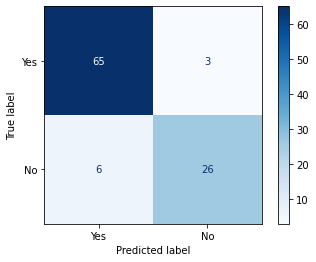

In [ ]:
# confusion Matrix
from sklearn.metrics import plot_confusion_matrix
import matplotlib.pyplot as plt 

disp = plot_confusion_matrix(kn_clf, X_test_scaled, y_test,
                              display_labels=['Yes','No'],
                              cmap=plt.cm.Blues)

## SVM

In [ ]:
# play with test size
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size= 0.20,shuffle=True,random_state=0,)
print(f' X_train: {X_train.shape} & X_test: {X_test.shape}')
print(f' y_train: {y_train.shape} & y_test: {y_test.shape}')

 X_train: (320, 4) & X_test: (80, 4)
 y_train: (320,) & y_test: (80,)


In [ ]:
from sklearn.preprocessing import LabelEncoder
encoder=LabelEncoder()
X_train[:,1] = encoder.fit_transform(X_train[:,1])
X_test[:,1]=encoder.transform(X_test[:,1] )
X_train

array([[15664907, 1, 58, 144000],
       [15605000, 0, 59, 83000],
       [15649136, 0, 24, 55000],
       ...,
       [15591433, 1, 36, 52000],
       [15776348, 0, 27, 54000],
       [15794661, 0, 26, 118000]], dtype=object)

In [ ]:
# Normalization 
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print(np.min(X_train_scaled))
print(np.max(X_train_scaled))

0.0
1.0


In [ ]:
# Training and Evaluating on the Training Set
from sklearn.svm import SVC

In [ ]:
svc_clf = SVC(C=10,kernel='linear',random_state=0)
svc_clf.fit(X_train_scaled,y_train)

SVC(C=10, kernel='linear', random_state=0)

In [ ]:
y_pred_en = svc_clf.predict(X_test_scaled)
y_pred_train = svc_clf.predict(X_train_scaled)
print('Accuracy score of Test: ', accuracy_score(y_test, y_pred_en)*100)
print('Accuracy score of Train: ', accuracy_score(y_train, y_pred_train)*100)

Accuracy score of Test:  91.25
Accuracy score of Train:  81.5625


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


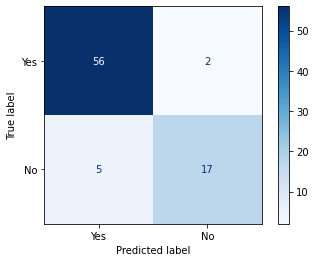

In [ ]:
# confusion Matrix
from sklearn.metrics import plot_confusion_matrix
import matplotlib.pyplot as plt 

disp = plot_confusion_matrix(svc_clf, X_test_scaled, y_test,
                              display_labels=['Yes','No'],
                              cmap=plt.cm.Blues)

In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,y_pred_en)
cm

array([[56,  2],
       [ 5, 17]])